<a href="https://colab.research.google.com/github/FeedingDejaj/MAT421/blob/main/ModGpart1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 21.1 Numerical Integration Problem Statement

- **Goal:** Approximate the definite integral  
  ∫ₐᵇ f(x) dx  
  when an analytical antiderivative is unavailable or difficult to obtain.
- **Basic Idea:** Divide [a, b] into n subintervals of width h = (b − a)/n and sum simple area approximations (rectangles, trapezoids, parabolas).
- **Trade-off:**  
  - A larger n (smaller h) reduces discretization (truncation) error but increases computational cost and may amplify round-off error.  
  - A smaller n reduces work but may lead to poor accuracy.
- **Methods:**  
  - Rectangle (Midpoint) Rule (order h²)  
  - Trapezoidal Rule (order h²)  
  - Simpson’s Rule (order h⁴)  



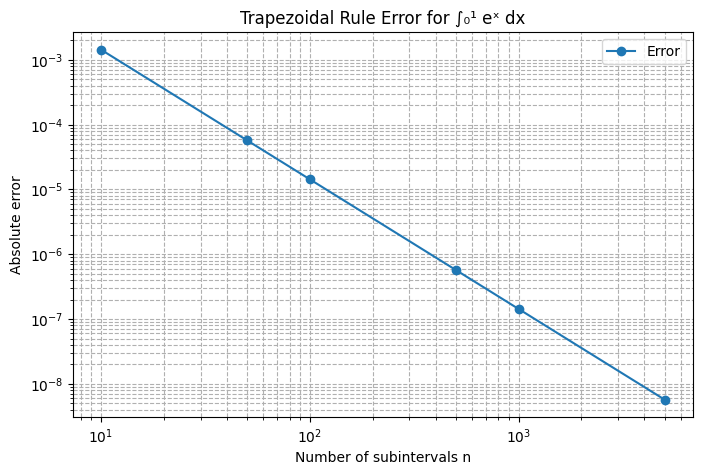

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def f(x):
    return np.exp(x)

def trapezoidal(f, a, b, n):
    h = (b - a) / n
    x = np.linspace(a, b, n+1)
    y = f(x)
    return (h/2) * (y[0] + 2*y[1:-1].sum() + y[-1])

a, b = 0.0, 1.0
exact = np.e - 1
n_values = np.array([10, 50, 100, 500, 1000, 5000])
errors = np.abs([trapezoidal(f, a, b, n) - exact for n in n_values])

plt.figure(figsize=(8,5))
plt.loglog(n_values, errors, 'o-', label='Error')
plt.xlabel('Number of subintervals n')
plt.ylabel('Absolute error')
plt.title('Trapezoidal Rule Error for ∫₀¹ eˣ dx')
plt.grid(True, which='both', ls='--')
plt.legend()
plt.show()




---



# 21.2 Riemann’s Integral

- **Problem Statement:** Approximate ∫ₐᵇ f(x) dx by summing areas of rectangles over n subintervals of equal width h = (b–a)/n.  
- **Left Riemann Sum:**  
  Iₗ = h · ∑_{i=0 to n–1} f(xᵢ)  
- **Right Riemann Sum:**  
  Iᵣ = h · ∑_{i=1 to n} f(xᵢ)  
- **Midpoint Rule:**  
  Iₘ = h · ∑_{i=0 to n–1} f((xᵢ + x_{i+1})/2)  
- **Error Orders:**  
  • Left/Right sums: O(h) overall  
  • Midpoint rule: O(h²) overall  
- As n increases (h decreases), all methods converge to the true integral, with midpoint typically converging faster.


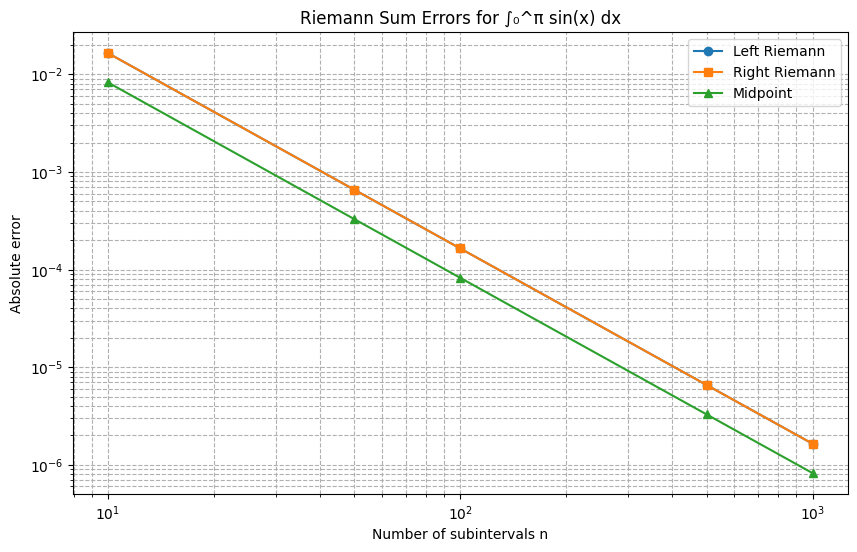

In [2]:
import numpy as np
import matplotlib.pyplot as plt

f = np.sin
a, b = 0.0, np.pi
exact = 2.0

n_values = np.array([10, 50, 100, 500, 1000])
errors_left = []
errors_right = []
errors_mid = []

for n in n_values:
    x = np.linspace(a, b, n+1)
    h = (b - a) / n
    I_left  = h * np.sum(f(x[:-1]))
    I_right = h * np.sum(f(x[1:]))
    I_mid   = h * np.sum(f((x[:-1] + x[1:]) / 2))
    errors_left.append(abs(I_left  - exact))
    errors_right.append(abs(I_right - exact))
    errors_mid.append(abs(I_mid   - exact))

plt.figure(figsize=(10,6))
plt.loglog(n_values, errors_left,  'o-', label='Left Riemann')
plt.loglog(n_values, errors_right, 's-', label='Right Riemann')
plt.loglog(n_values, errors_mid,   '^-', label='Midpoint')
plt.xlabel('Number of subintervals n')
plt.ylabel('Absolute error')
plt.title('Riemann Sum Errors for ∫₀^π sin(x) dx')
plt.legend()
plt.grid(True, which='both', ls='--')
plt.show()




---



# 21.3 Trapezoid Rule

- **Principle:**  Approximate ∫ₐᵇ f(x) dx by fitting trapezoids on each subinterval [xᵢ, xᵢ₊₁].  
- **Formula (composite):**  
  Let h = (b–a)/n and xᵢ = a + i·h. Then  
  ∫ₐᵇ f(x) dx ≈ h/2 · [f(x₀) + 2∑_{i=1}^{n–1} f(xᵢ) + f(xₙ)]  
- **Error Analysis:**  
  • Single-subinterval error is O(h³), leading to a global error of O(h²) when summed.  
  • Derivation uses Taylor expansion around each midpoint and shows symmetric cancellation of odd terms.
- Compared to simpler Riemann sums (O(h)), the trapezoid rule often yields significantly improved accuracy for smooth f(x).


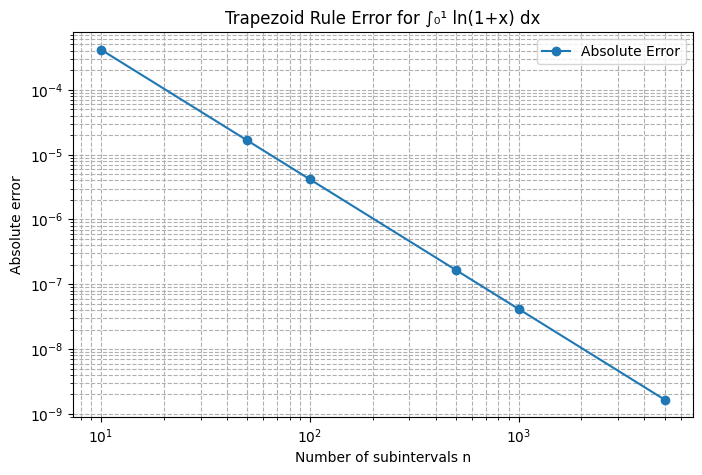

In [3]:
import numpy as np
import matplotlib.pyplot as plt

def f(x):
    return np.log1p(x)   # f(x) = ln(1+x)

def trapezoid(f, a, b, n):
    h = (b - a) / n
    x = np.linspace(a, b, n+1)
    y = f(x)
    return (h/2) * (y[0] + 2*y[1:-1].sum() + y[-1])

a, b = 0.0, 1.0
exact = 2*np.log(2) - 1
n_values = np.array([10, 50, 100, 500, 1000, 5000])
errors = np.abs([trapezoid(f, a, b, n) - exact for n in n_values])

plt.figure(figsize=(8,5))
plt.loglog(n_values, errors, 'o-', label='Absolute Error')
plt.xlabel('Number of subintervals n')
plt.ylabel('Absolute error')
plt.title("Trapezoid Rule Error for ∫₀¹ ln(1+x) dx")
plt.grid(True, which='both', ls='--')
plt.legend()
plt.show()
